# New minimum VPD experiment

Constant VPD simulation ($VPD=0.05$ kPa): ```/glade/scratch/bbuchovecky/archive/minCnstVPDforPhoto_PI_SOM/<gcomp>/hist/```

Control experiment: ```/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/<gcomp>/proc/tseries/```

# Setup

In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import pickle as pkl

import cartopy
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.path as mpath

import matplotlib.gridspec as gs

import cmocean.cm as cmo

In [2]:
## Some magic to automatically reload my functions before running a new cell
%load_ext autoreload
%autoreload 1
%aimport climate_data_science_functions

import climate_data_science_functions as cds

## Figure settings

In [3]:
## Adjust dpi
mpl.rcParams['figure.dpi'] = 100

## Assign figure output format
# %config InlineBackend.figure_formats = ['pdf']  ## vector, transparent background -> best for publication
# %config InlineBackend.figure_formats = ['png']  ## raster, transparent background -> best for publication of large, dense figures
%config InlineBackend.figure_formats = ['jpg']  ## raster, white background -> best for adding to notes

# Dictionaries and constants

In [4]:
case = {
    'cst':'minCnstVPDforPhoto_PI_SOM',
    'ctl':'COUP0000_PI_SOM'
}

path = {
    'cst': '/glade/scratch/bbuchovecky/archive/minCnstVPDforPhoto_PI_SOM/',
    'ctl': '/glade/scratch/bbuchovecky/archive/COUP0000_PI_SOM/'
}

with open('/glade/u/home/bbuchovecky/cesm_analysis_dicts/cesm2_masks.pkl', 'rb') as handle:
    masks = pkl.load(handle)

scomp = {
    'atm': 'cam',
    'lnd': 'clm2'
}

variable = {
    'atm':{
        'trefht',   # near-surface air temperature [degC]
        'prect',  # total precipitation rate [mm/day]
        # 'fsns',   # net solar flux at surface, +down [W/m2]
        # 'fsds',   # downwelling solar flux at surface, +down [W/m2]
        # 'fsus',   # upwelling solar flux at surface, +up [W/m2]
        # 'flns',   # net longwave flux at surface, +down [W/m2]
        # 'flds',   # downwelling longwave flux at surface, +down [W/m2]
        # 'flus',   # upwelling longwave flux at surface, +up [W/m2]
        'lhflx',  # latent heat flux at surface, +up [W/m2]
        # 'et',     # evapotranspiration flux at surface [mm/day]
        # 'shflx',  # sensible heat flux at surface, +up [W/m2]
        # 'nrad',   # net radiation at surface, +down [W/m2]
        # 'stor'    # heat uptake/storage of surface, +up [W/m2]
    },
    'lnd':{
        'gssunln',     # sunlit leaf stomatal conductance at local noon [umol/m2/s]
        'fctr',        # canopy transpiration [W/m2]
        # 'qvegt',       # canopy transpiration [mm/m2]
        'btran2',      # root zone soil wetness factor [1]
        'btranmn',     # daily minimum of transpiration beta factor [1]
        'tlai',        # total projected leaf area index [m2/m2]
        'gpp',         # gross primary production [gC/m2/s]
        'tsa',         # 2m air temperature [K]
        # 'tranlai',     # canopy transpiration per LAI (FCTR/TLAI)
        'h2osoi',      # volumetric soil water [mm3/mm3]
        'soilliq',     # soil liquid water [kg/m2]
        'totsoilliq',  # vertically summed soil liquid water [kg/m2	]
        'npp_nuptake', # total C used by N uptake in FUN [gC/m2/s]
        'nuptake',     # total N uptake of FUN [gN/m2/s]
    }
}

calc_variable = ['prect']

unit = {
    'gssunln':'[$\mu$mol H$_2$O m$^{-2}$ s$^{-1}$]',
    'fctr':'[W m$^{-2}$]',
    'btran2':'[1]',
    'btranmn':'[1]',
    'tlai':'[m$^2$ m$^{-2}$]',
    'gpp':'[gC m$^{-2}$ s$^{-1}$]',
    'tsa':'[K]',
    'tranlai':'[(W m$^{-2}$) (m$^2$ m$^{-2}$)$^{-1}$]'
}

subplot_kws = {'projection': ccrs.Robinson()}
cbar_kwargs = {'orientation':'vertical', 'fraction':0.025}

tslice = slice('0049-01','0099-12')

# Load output

In [5]:
vardict = {}
verbose = False

for cc in case.keys():
    if verbose: print(cc)
    vardict[cc] = {}
    for gc in variable.keys():
        if verbose: print('  '+gc)
        vardict[cc][gc] = {}
        for vv in variable[gc]:
            if verbose: print('    '+vv)
            if vv in calc_variable: vv = 'calculated_'+vv.upper()
            else: vv = vv.upper()
            vardict[cc][gc][vv.lower()] = xr.open_dataset(path[cc]+gc+'/proc/tseries/'+case[cc]+'.'+scomp[gc]+'.h0.timeseries.'+vv+'.nc')[vv].sel(time=tslice)
            if verbose: print('      '+path[cc]+gc+'/proc/tseries/'+case[cc]+'.'+scomp[gc]+'.h0.timeseries.'+vv+'.nc')

In [6]:
for cc in case.keys():
    print(cc)
    for gc in variable.keys():
        print('  '+gc)
        for vv in variable[gc]:
            if vv in calc_variable: vv = 'calculated_'+vv
            print('    '+vv+' --- '+str(vardict[cc][gc][vv.lower()].sizes))

cst
  atm
    trefht --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
    lhflx --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
    calculated_prect --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
  lnd
    btranmn --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
    nuptake --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
    tsa --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
    soilliq --- Frozen({'time': 612, 'levsoi': 20, 'lat': 96, 'lon': 144})
    btran2 --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
    totsoilliq --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
    gssunln --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
    h2osoi --- Frozen({'time': 612, 'levsoi': 20, 'lat': 96, 'lon': 144})
    fctr --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
    gpp --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
    npp_nuptake --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
    tlai --- Frozen({'time': 612, 'lat': 96, 'lon': 144})
ctl
  atm
    trefht --- Frozen({'time': 612

# Time-average maps

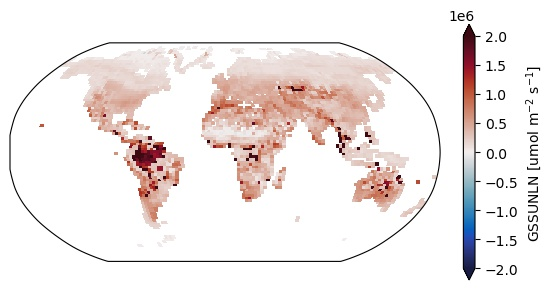

In [8]:
vv = 'gssunln'
gc = 'lnd'
(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance,
                                                                      vmin=-2e6, vmax=2e6, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [umol m$^{-2}$ s$^{-1}$]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree())

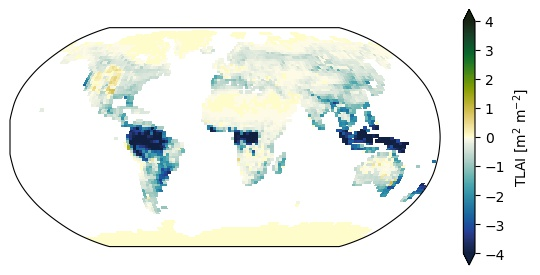

In [11]:
vv = 'tlai'
gc = 'lnd'
(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.delta,
                                                                      vmin=-4, vmax=4, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [m$^2$ m$^{-2}$]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree())

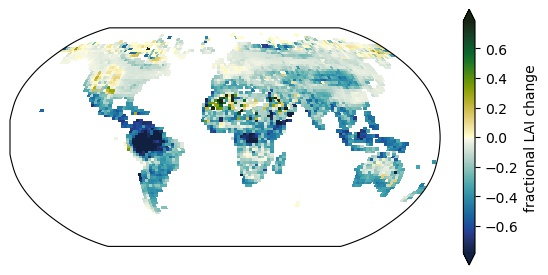

In [12]:
vv = 'tlai'
gc = 'lnd'

((vardict['cst'][gc][vv]-vardict['ctl'][gc][vv])/(vardict['cst'][gc][vv]+vardict['ctl'][gc][vv])).mean(dim='time').plot(cmap=cmo.delta,
                                                                                                                        # vmin=-100, vmax=100,
                                                                                                                        robust=True, extend='both',
                                                                                                                        cbar_kwargs={**cbar_kwargs, **{'label': 'fractional LAI change'}},
                                                                                                                        subplot_kws=subplot_kws,
                                                                                                                        transform=ccrs.PlateCarree())

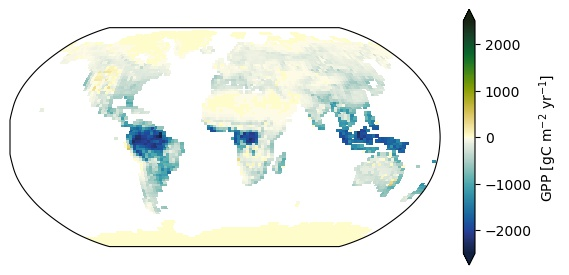

In [13]:
vv = 'gpp'
gc = 'lnd'
((vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time')*31536000).plot(cmap=cmo.delta,
                                                                                 vmin=-2500, vmax=2500, extend='both',
                                                                                 cbar_kwargs={**cbar_kwargs,**{'label':'GPP [gC m$^{-2}$ yr$^{-1}$]'}},
                                                                                 subplot_kws=subplot_kws,
                                                                                 transform=ccrs.PlateCarree())

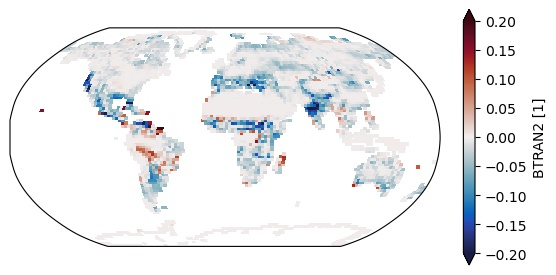

In [14]:
vv = 'btran2'
gc = 'lnd'
(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance,
                                                                      vmin=-0.2, vmax=0.2, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [1]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree())

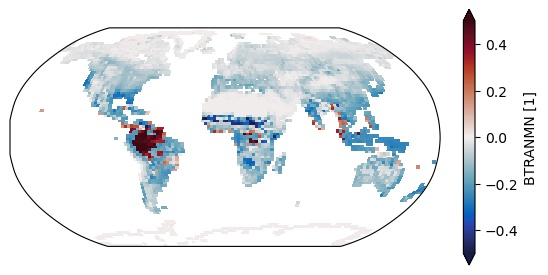

In [15]:
vv = 'btranmn'
gc = 'lnd'
(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance,
                                                                       vmin=-0.5, vmax=0.5, extend='both',
                                                                       cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [1]'}},
                                                                       subplot_kws=subplot_kws,
                                                                       transform=ccrs.PlateCarree())

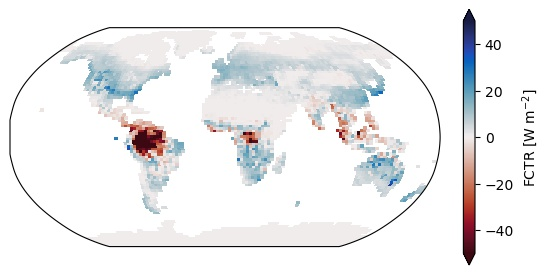

In [17]:
vv = 'fctr'
gc = 'lnd'
(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance_r,
                                                                      vmin=-50, vmax=50, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [W m$^{-2}$]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree())

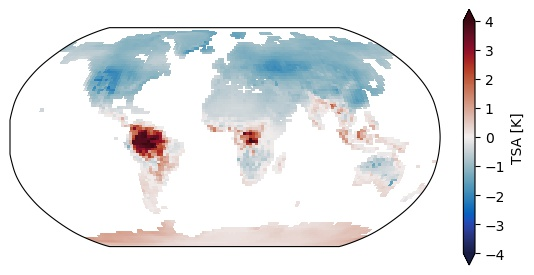

In [18]:
vv = 'tsa'
gc = 'lnd'
(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance,
                                                                      vmin=-4, vmax=4, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs, **{'label':vv.upper()+' [K]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree())

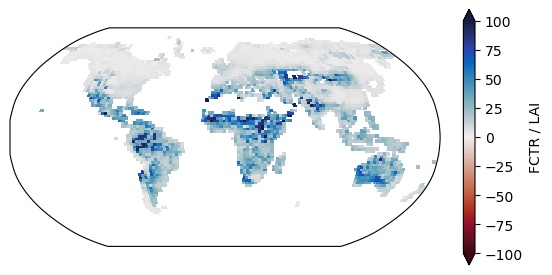

In [36]:
var1 = 'fctr'
var2 = 'tlai'
gc = 'lnd'
threshlai = 0.05

((vardict['cst'][gc][var1]/vardict['cst'][gc][var2].where(vardict['cst'][gc][var2]>threshlai))
 -(vardict['ctl'][gc][var1]/vardict['ctl'][gc][var2].where(vardict['ctl'][gc][var2]>threshlai))).mean(dim='time').plot(cmap=cmo.balance_r,
                                                                                                           vmin=-100, vmax=100, extend='both',
                                                                                                           cbar_kwargs={**cbar_kwargs, **{'label': 'FCTR / LAI'}},
                                                                                                           subplot_kws=subplot_kws,
                                                                                                           transform=ccrs.PlateCarree())

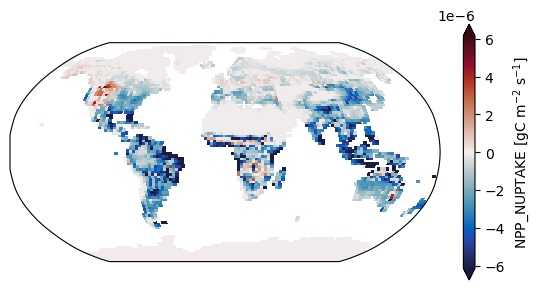

In [20]:
vv = 'npp_nuptake'
gc = 'lnd'
(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance,
                                                                      robust=True, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [gC m$^{-2}$ s$^{-1}$]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree())

Text(0.5, 1.0, 'Average over first 10 years')

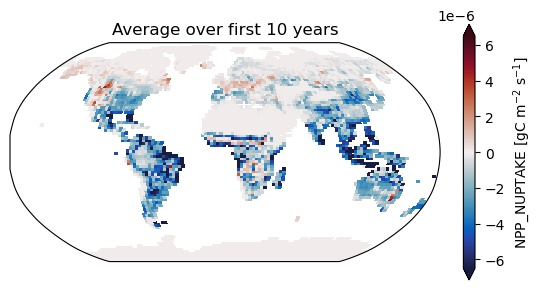

In [127]:
vv = 'npp_nuptake'
gc = 'lnd'
(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).sel(time=slice('004901','005912')).mean(dim='time').plot(cmap=cmo.balance,
                                                                      robust=True, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [gC m$^{-2}$ s$^{-1}$]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree())
plt.title('Average over first 10 years')

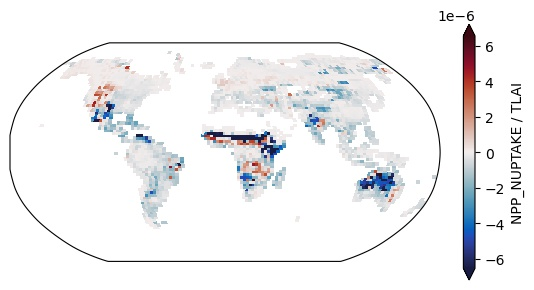

In [146]:
var1 = 'npp_nuptake'
var2 = 'tlai'
gc = 'lnd'
threshlai = 0.05

((vardict['cst'][gc][var1]/vardict['cst'][gc][var2].where(vardict['cst'][gc][var2]>threshlai))
 -(vardict['ctl'][gc][var1]/vardict['ctl'][gc][var2].where(vardict['ctl'][gc][var2]>threshlai))).mean(dim='time').plot(cmap=cmo.balance,
                                                                                                           robust=True,
                                                                                                           extend='both',
                                                                                                           cbar_kwargs={**cbar_kwargs, **{'label': 'NPP_NUPTAKE / TLAI'}},
                                                                                                           subplot_kws=subplot_kws,
                                                                                                           transform=ccrs.PlateCarree())

Text(0.5, 1.0, 'Average over first 10 years')

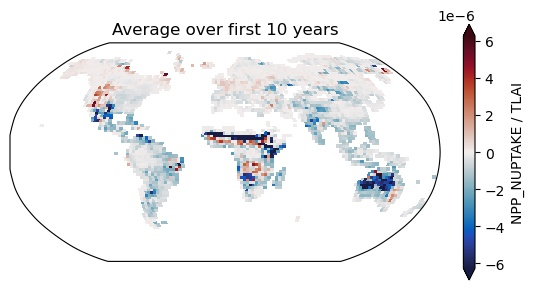

In [142]:
var1 = 'npp_nuptake'
var2 = 'tlai'
gc = 'lnd'
threshlai = 0.05

((vardict['cst'][gc][var1]/vardict['cst'][gc][var2].where(vardict['cst'][gc][var2]>threshlai))
 -(vardict['ctl'][gc][var1]/vardict['ctl'][gc][var2].where(vardict['ctl'][gc][var2]>threshlai))).sel(time=slice('004901','005912')).mean(dim='time').plot(cmap=cmo.balance,
                                                                                                           robust=True,
                                                                                                           extend='both',
                                                                                                           cbar_kwargs={**cbar_kwargs, **{'label': 'NPP_NUPTAKE / TLAI'}},
                                                                                                           subplot_kws=subplot_kws,
                                                                                                           transform=ccrs.PlateCarree())
plt.title('Average over first 10 years')

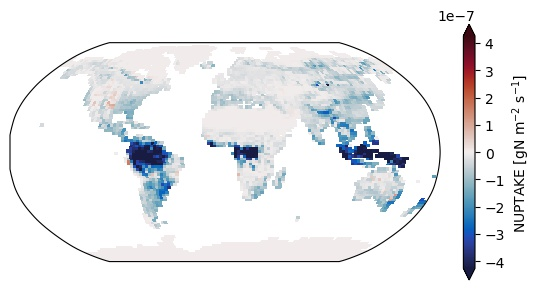

In [21]:
vv = 'nuptake'
gc = 'lnd'
(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance,
                                                                      robust=True, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [gN m$^{-2}$ s$^{-1}$]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree())

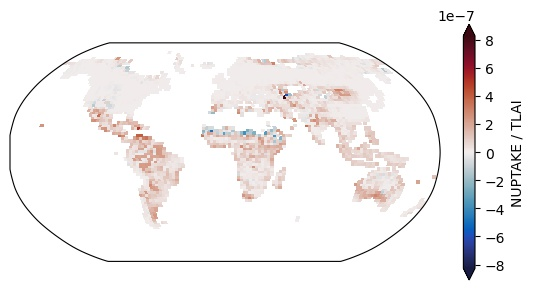

In [144]:
var1 = 'nuptake'
var2 = 'tlai'
gc = 'lnd'
threshlai = 0.05

((vardict['cst'][gc][var1]/vardict['cst'][gc][var2].where(vardict['cst'][gc][var2]>threshlai))
 -(vardict['ctl'][gc][var1]/vardict['ctl'][gc][var2].where(vardict['ctl'][gc][var2]>threshlai))).mean(dim='time').plot(cmap=cmo.balance,
                                                                                                           # robust=True,
                                                                                                           extend='both',
                                                                                                           cbar_kwargs={**cbar_kwargs, **{'label': 'NUPTAKE / TLAI'}},
                                                                                                           subplot_kws=subplot_kws,
                                                                                                           transform=ccrs.PlateCarree())

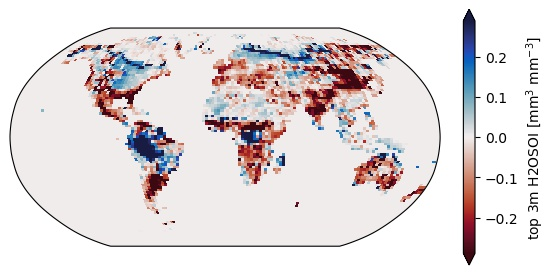

In [23]:
vv = 'h2osoi'
gc = 'lnd'
(vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi')
 -vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi')).mean(dim='time').plot(cmap=cmo.balance_r,
                                                                                         # vmin=-50, vmax=50,
                                                                                         robust=True, extend='both',
                                                                                         cbar_kwargs={**cbar_kwargs, **{'label': 'top 3m H2OSOI [mm$^3$ mm$^{-3}$]'}},
                                                                                         subplot_kws=subplot_kws,
                                                                                         transform=ccrs.PlateCarree())

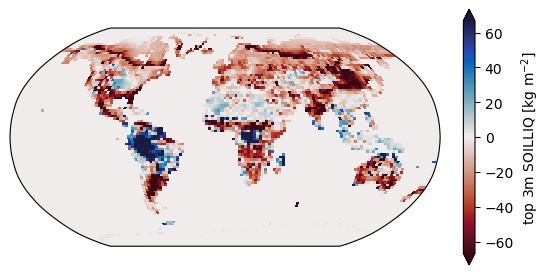

In [24]:
vv = 'soilliq'
gc = 'lnd'
(vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi')
 -vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi')).mean(dim='time').plot(cmap=cmo.balance_r,
                                                                                         # vmin=-50, vmax=50,
                                                                                         robust=True, extend='both',
                                                                                         cbar_kwargs={**cbar_kwargs, **{'label': 'top 3m SOILLIQ [kg m$^{-2}$]'}},
                                                                                         subplot_kws=subplot_kws,
                                                                                         transform=ccrs.PlateCarree())

# Timeseries

In [8]:
wght = np.cos(np.deg2rad(vardict['cst']['lnd']['tlai'].lat))

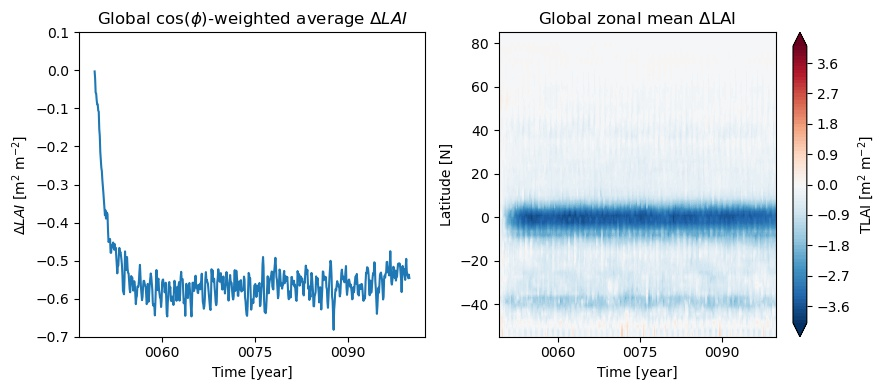

In [9]:
vv = 'tlai'
gc = 'lnd'

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst']['lnd']['tlai']) - cds.coslat_area_avg(vardict['ctl']['lnd']['tlai'])).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta LAI$')
ax[0].set_ylabel('$\Delta LAI$ [m$^2$ m$^{-2}$]')
ax[0].set_xlabel('Time [year]')
ax[0].set_ylim(-0.7, 0.1)

(vardict['cst']['lnd']['tlai'].mean(dim='lon')*wght
 -vardict['ctl']['lnd']['tlai'].mean(dim='lon')*wght).transpose().plot.contourf(levels=101,
                                                                                ax=ax[1],
                                                                                extend='both',
                                                                                cbar_kwargs={'label': 'TLAI [m$^{2}$ m$^{-2}$]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$LAI')

fig.tight_layout()

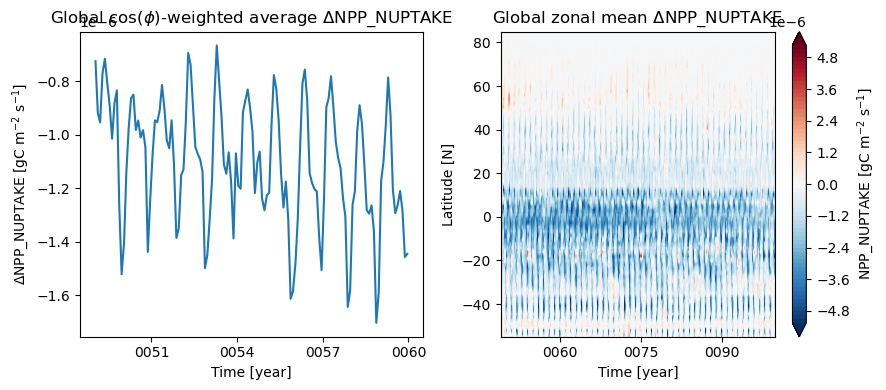

In [115]:
vv = 'npp_nuptake'
gc = 'lnd'

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv].sel(time=slice('004901','005912'))) - cds.coslat_area_avg(vardict['ctl'][gc][vv].sel(time=slice('004901','005912')))).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$NPP_NUPTAKE')
ax[0].set_ylabel('$\Delta$NPP_NUPTAKE [gC m$^{-2}$ s$^{-1}$]')
ax[0].set_xlabel('Time [year]')
# ax[0].set_ylim(-0.7, 0.1)

(vardict['cst'][gc][vv].mean(dim='lon')*wght
 -vardict['ctl'][gc][vv].mean(dim='lon')*wght).transpose().plot.contourf(levels=101,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [gC m$^{-2}$ s$^{-1}$]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$NPP_NUPTAKE')

fig.tight_layout()

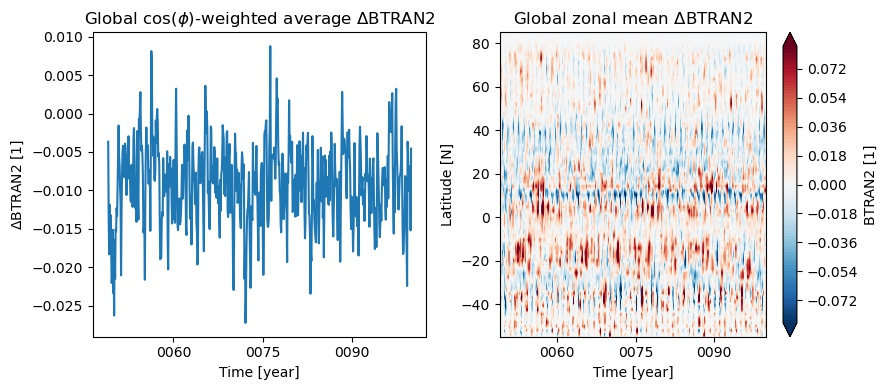

In [14]:
vv = 'btran2'
gc = 'lnd'

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv]) - cds.coslat_area_avg(vardict['ctl'][gc][vv])).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$'+vv.upper())
ax[0].set_ylabel('$\Delta$'+vv.upper()+' [1]')
ax[0].set_xlabel('Time [year]')

(vardict['cst'][gc][vv].mean(dim='lon')*wght
 -vardict['ctl'][gc][vv].mean(dim='lon')*wght).transpose().plot.contourf(levels=101,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [1]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$'+vv.upper())

fig.tight_layout()

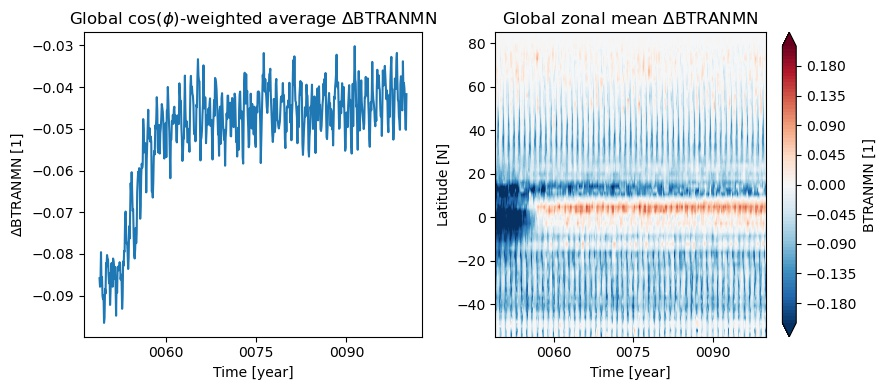

In [15]:
vv = 'btranmn'
gc = 'lnd'

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv]) - cds.coslat_area_avg(vardict['ctl'][gc][vv])).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$'+vv.upper())
ax[0].set_ylabel('$\Delta$'+vv.upper()+' [1]')
ax[0].set_xlabel('Time [year]')

(vardict['cst'][gc][vv].mean(dim='lon')*wght
 -vardict['ctl'][gc][vv].mean(dim='lon')*wght).transpose().plot.contourf(levels=101,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [1]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$'+vv.upper())

fig.tight_layout()

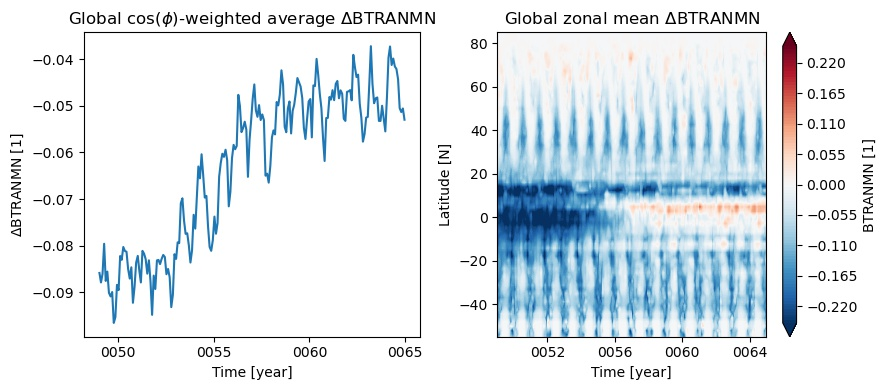

In [32]:
vv = 'btranmn'
gc = 'lnd'
ts = slice('004901','006412')

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv].sel(time=ts)) - cds.coslat_area_avg(vardict['ctl'][gc][vv].sel(time=ts))).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$'+vv.upper())
ax[0].set_ylabel('$\Delta$'+vv.upper()+' [1]')
ax[0].set_xlabel('Time [year]')

(vardict['cst'][gc][vv].mean(dim='lon').sel(time=ts)*wght
 -vardict['ctl'][gc][vv].mean(dim='lon').sel(time=ts)*wght).transpose().plot.contourf(levels=101,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [1]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$'+vv.upper())

fig.tight_layout()

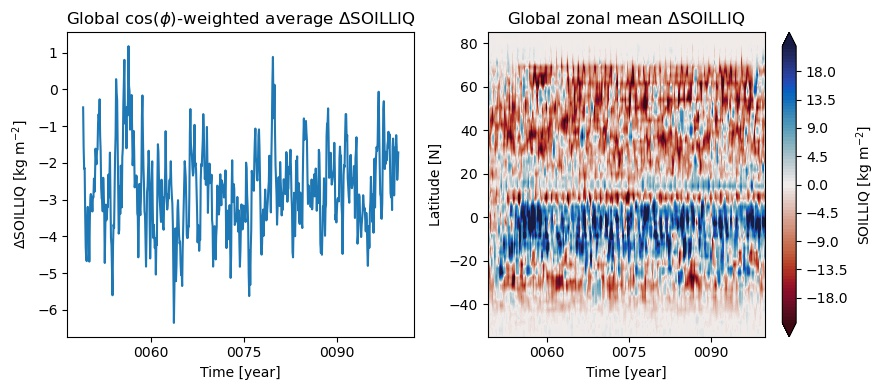

In [25]:
vv = 'soilliq'
gc = 'lnd'

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi')) - cds.coslat_area_avg(vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi'))).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$'+vv.upper())
ax[0].set_ylabel('$\Delta$'+vv.upper()+' [kg m$^{-2}$]')
ax[0].set_xlabel('Time [year]')

(vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi').mean(dim='lon')*wght
 -vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi').mean(dim='lon')*wght).transpose().plot.contourf(levels=101, cmap=cmo.balance_r,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [kg m$^{-2}$]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$'+vv.upper())

fig.tight_layout()

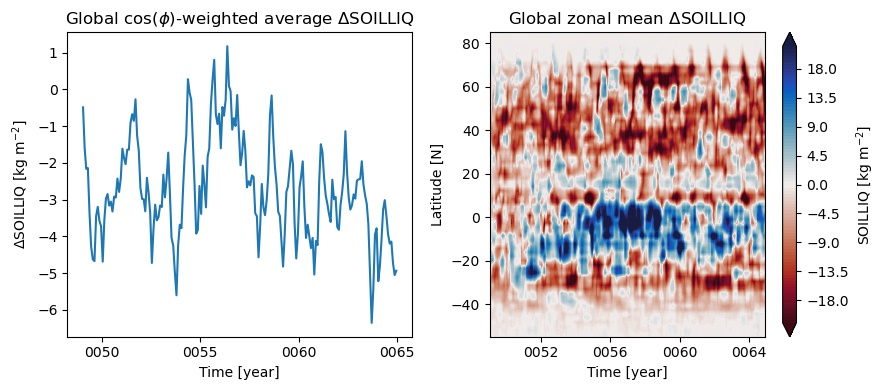

In [33]:
vv = 'soilliq'
gc = 'lnd'
ts = slice('004901','006412')

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi').sel(time=ts)) - cds.coslat_area_avg(vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi').sel(time=ts))).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$'+vv.upper())
ax[0].set_ylabel('$\Delta$'+vv.upper()+' [kg m$^{-2}$]')
ax[0].set_xlabel('Time [year]')

(vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi').sel(time=ts).mean(dim='lon')*wght
 -vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi').sel(time=ts).mean(dim='lon')*wght).transpose().plot.contourf(levels=101, cmap=cmo.balance_r,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [kg m$^{-2}$]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$'+vv.upper())

fig.tight_layout()